<center>
  <font size=6><b>Electronic Thesis and Dissertations Automatic Guidelines Verification
</b></font>

   Mubanga Chibesa 2020031345@student.unza.zm<sup>1</sup> Albertina Mooka 2020019299@student.unza.zm<sup>2</sup> Gift Muwele 2020014203@student.unza.zm<sup>2</sup> and Lwiime Shansonga 2020002353@student.unza.zm <sup>4</sup>

  <sup>1</sup> Department of Library and Information Science, University of Zambia, P.O Box 32379, Lusaka, Zambia</br>

  Supervisor: Dr.Lighton Phiri lighton.phiri@unza.zm
  <br/>

  August 2024
</center>

<justify>
Higher Education Institutions worldwide enforce guidelines and academic approaches to ensure scholarly integrity and adherence to academic standards.The University of Zambia, is not an exception. Just like most HEIs it offers  training to postgraduate students and one of the key aspects of postgraduate training is producing an Electronic Thesis and Dissertation manuscript. The Directorate of Research and Graduate Studies (DRGS) at the University of Zambia provides guidelines which stipulate how ETD’s should be formatted. However, the process of  checking for conformance is a manual and tedious procedure, resulting in submission of inconsistently formatted manuscripts in the Institutional Repository (UNZA IR).
To address this challenge, we embarked on a  project to implement a tool that will automate the process of checking ETD’s compliance against established postgraduate guidelines, leveraging data mining techniques to perform these tasks. More specifically, Document Layout Analysis (DLA) is the core approach used in  the implementation. The tool flags off portions of ETD manuscripts that do not  conform to established guidelines.
Using a mixed methods approach, document analysis was employed to understand the postgraduate guidelines stipulated in the “Regulations and Guidelines for Postgraduate Studies” guidelines document; content analysis was be used on randomly sampled ETDs in order to experimentally determine the extent of the problem and, finally.
Upon successful completion of this project, we anticipate a reduced workload associated with the process of manually checking if manuscripts conform to postgraduate guidelines, freeing up time and resources to handle other academic tasks like attending more to the content of the manuscripts. Not only that, academic integrity is consequently going to be improved through the standardisation of ETD formats and this will add to the university’s reputation and credibility.
</justify>




**Proposed Solution**

 To implement a tool that will automate the process of checking the compliance of ETDs to postgraduate guidelines and consequently enhance the compliance levels of ETDs published on the University of Zambia's institutional repository thereafter. The tool will have a focus on improving the efficiency of the document  review process by employing data mining techniques, specifically Document Layout Analysis (DLA) Strategies in the implementation of this pipeline. The key feature of this tool is evaluating the layout of ETDs against institutional guidelines and flagging off portions of these manuscripts that do not conform to the guidelines

 This Notebook outlines how data mining techniques were utilised to flag fo portions of manuscripts that do not conform to the postgraduate guidelines.

**Methodology**

**Packages and Libraries Imports**

In [ ]:
# @title Libraries and Packages Imports
!apt-get install poppler-utils
!pip install --upgrade deepdoctection
!pip install deepdoctection
!pip install Tensorflow
!pip install pytorch
!apt-get install tesseract-ocr
!pip install pdfplumber
!pip install pdf2image

import deepdoctection as dd
from pdf2image import convert_from_path
from pathlib import Path
from matplotlib import pyplot as plt
from pathlib import Path
from deepdoctection import get_dd_analyzer
from google.colab import files
uploaded = files.upload()
import json






Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
[0829 04:18.31 @utils.py:161]  INF  NumExpr defaulting to 2 threads.
[0829 04:18.32 @env_info.py:449]  WRN  Both DD_USE_TORCH and DD_USE_TF are set. Defaulting to PyTorch. If you want a different behaviour, set DD_USE_TORCH to None before importing deepdoctection.


Saving VET5.pdf to VET5.pdf


**Document Format Compliance Verification**

[0829 04:35.37 @dd.py:464]  INF  Config: 
 {'DEVICE': device(type='cpu'),
 'LANGUAGE': 'eng',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PDF_MINER': {'X_TOLERANCE': 3, 'Y_TOLERANCE': 3},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
      

The document has fewer than 150 pages.


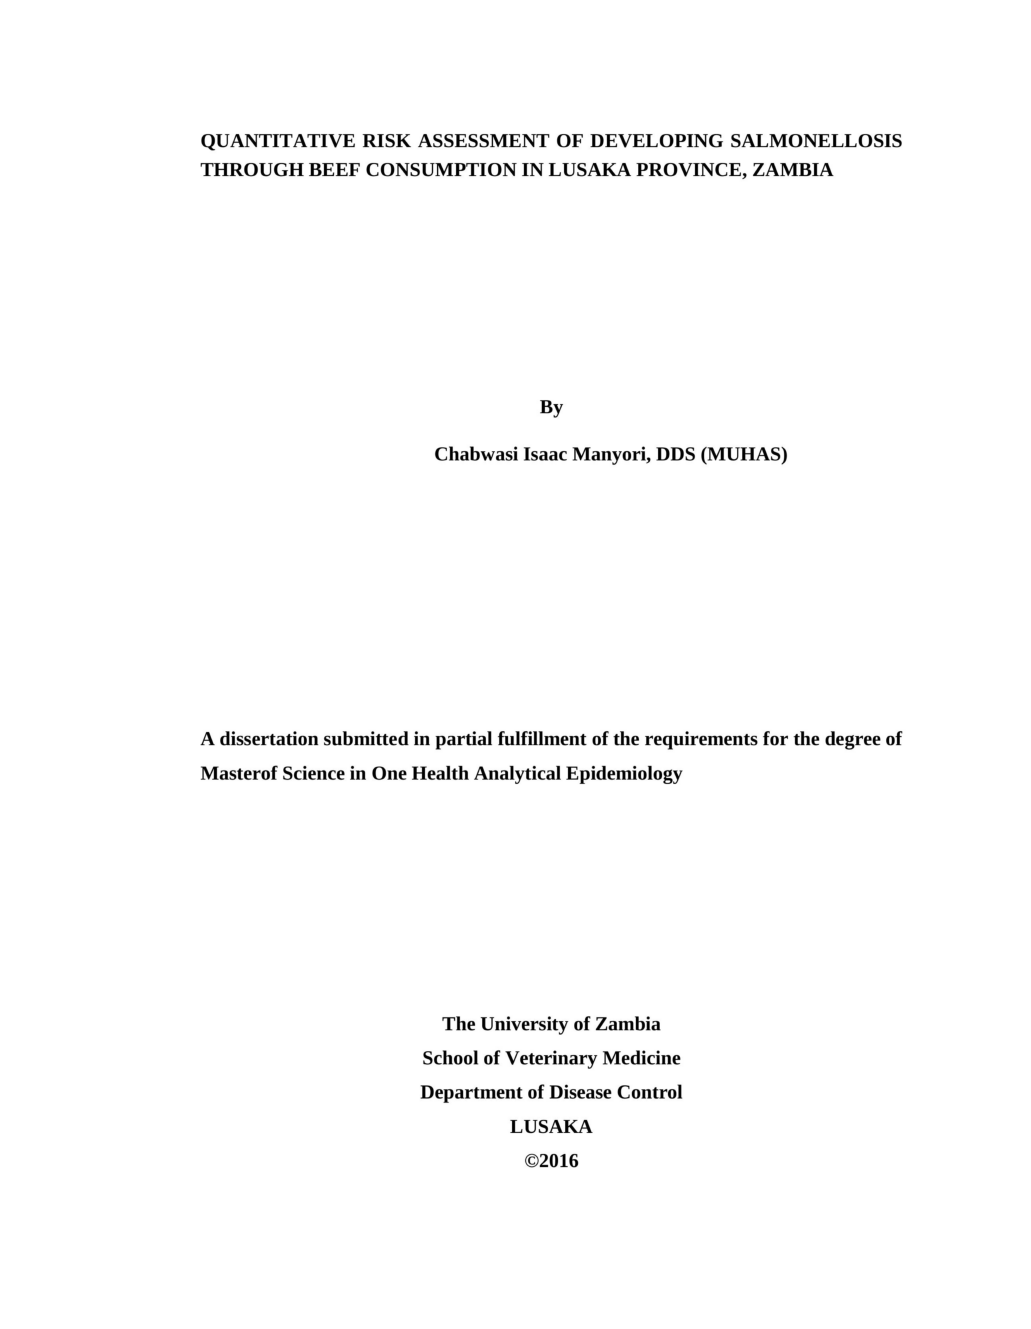

TypeError: DoctectionPipe.analyze() takes 1 positional argument but 2 were given

In [ ]:
analyzer = dd.get_dd_analyzer(config_overwrite=["LANGUAGE='eng'"])

#Access uploaded pdf file
pdf_file = next(iter(uploaded))

# Set PDF file path
pdf_path = Path(r"ETD-ED1.pdf")

# Convert PDF to a list of images (one per page)
pages = convert_from_path(pdf_path, dpi=300)

# Check if the document pages are less than 150
if len(pages) >= 150:
    print("The document has 150 or more pages.")
else:
    print("The document has fewer than 150 pages.")

# Display the first page (or any other page by indexing into `pages`)
plt.figure(figsize=(25, 17))
plt.axis('off')
plt.imshow(pages[0])  # pages[0] corresponds to the first page of the PDF
plt.show()

# Process each page image using the analyzer
results = []
for i, page_image in enumerate(pages):
    # Convert the PIL image to a format compatible with deepdoctection
    page_image_path = Path(f"page_{i}.png")
    page_image.save("ETD-ED1.pdf")
# Analyze the image
    analysis_result = analyzer.analyze(page_image_path)
    results.append (analysis_result)
    print(f"Analysis result for page {i}:", analysis_result)

# Check font size for each page (assumed field in analysis_result)
    if 'font_size' in analysis_result:
        font_size = analysis_result['font_size']
        print(f"Page {i} font size:", font_size)

        if font_size != 12:
            print(f"Warning: Page {i} does not have the correct font size. Expected 12pt.")
else:
        print(f"Font size information not available for page {i}.")
        # Check if the abstract is a page long or 300 characters (assumed fields in analysis_result)
if 'abstract_length_pages' in analysis_result and 'abstract_length_chars' in analysis_result:
    abstract_length_pages = analysis_result['abstract_length_pages']
    abstract_length_chars = analysis_result['abstract_length_chars']

    print(f"Abstract length: {abstract_length_pages} page(s), {abstract_length_chars} characters")

    # Check if the abstract is exactly one page or 300 characters long
    if abstract_length_pages == 1 or abstract_length_chars == 300:
        print("The abstract meets the requirement of being one page long or exactly 300 characters.")
    else:
        print("Warning: The abstract does not meet the requirement of being one page long or exactly 300 characters.")
else:
    print("Abstract length information is not available in pages or characters.")

#save results as json file
with open("analysis_results.json", "w") as f:
    json.dump(results, f, indent=4)

**Compliance Report Generator**

In [ ]:
# Define the document processing function
def process_document(file_path):
    # Process the document
    pages = pipe(file_path)
    doc = Page(pages)

    # Check compliance
    compliance_report = check_compliance(doc)

    return compliance_report

